### Import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
from skimage import io
import sys
import seaborn as sns
from scipy import spatial

In [2]:
sys.path.insert(1, "/Users/k1801626/OneDrive - King's College London/git/AFT-Alignment_by_Fourier_Transform/Python_implementation/")
import AFT_tools as AFT       

In [3]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

### Import data (csv tracks and images)

In [123]:
csv_folder = "/Users/k1801626/OneDrive - King's College London/data/JP/AFT_track/"
image_folder = "/Users/k1801626/OneDrive - King's College London/data/JP/AFT_track/siCCT8_si5/"

In [5]:
spots_list = glob.glob(csv_folder+'*Spots.csv')

print(*spots_list, sep="\n")

/Users/k1801626/OneDrive - King's College London/data/JP/AFT_track/merged_Spots.csv


In [6]:
tracks_list = glob.glob(csv_folder+'*Tracks.csv')

print(*tracks_list, sep="\n")

/Users/k1801626/OneDrive - King's College London/data/JP/AFT_track/merged_Tracks.csv


In [124]:
image_list = glob.glob(image_folder+'*.tif')

print(*image_list, sep="\n")

/Users/k1801626/OneDrive - King's College London/data/JP/AFT_track/siCCT8_si5/Position_26_AFT.tif
/Users/k1801626/OneDrive - King's College London/data/JP/AFT_track/siCCT8_si5/Position_27_AFT.tif


### Parameters

In [8]:
output_image_folder = csv_folder+'output_images/'

In [9]:
single_frame = False

In [10]:
#### required AFT parameters ####
window_size = 100
overlap = 0.6
neighborhood_radius = 5

### Load data

In [11]:
df_spots = pd.read_csv(spots_list[0])
df_spots.head()

,LABEL,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,...,PERIMETER,CIRCULARITY,SOLIDITY,SHAPE_INDEX,File_name_raw,Condition,experiment_nb,File_name,Repeat,Unique_ID
0,ID2560,2560,1,113788.0,446.481612,463.926373,0.0,26.0,26,190.336445,...,1850.608931,0.417613,0.884730,5.485520,Position_26,siCCT8_si5,R1,siCCT8_si5_R1_Position_26,1,siCCT8_si5_R1_Position_26_1
1,ID2435,2435,1,64912.0,186.902997,251.383041,0.0,1.0,1,143.727227,...,1103.639245,0.669551,0.961309,4.332246,Position_26,siCCT8_si5,R1,siCCT8_si5_R1_Position_26,1,siCCT8_si5_R1_Position_26_1
2,ID2563,2563,1,111268.0,432.193334,454.720643,0.0,27.0,27,188.187463,...,1845.354851,0.410564,0.845194,5.532409,Position_26,siCCT8_si5,R1,siCCT8_si5_R1_Position_26,1,siCCT8_si5_R1_Position_26_1
3,ID2437,2437,1,71143.0,230.466989,274.844695,0.0,4.0,4,150.484286,...,1161.466995,0.662717,0.959538,4.354525,Position_26,siCCT8_si5,R1,siCCT8_si5_R1_Position_26,1,siCCT8_si5_R1_Position_26_1
4,ID2565,2565,1,123560.0,441.649200,460.855612,0.0,28.0,28,198.340124,...,1885.321437,0.436928,0.854008,5.362902,Position_26,siCCT8_si5,R1,siCCT8_si5_R1_Position_26,1,siCCT8_si5_R1_Position_26_1


In [12]:
df_tracks = pd.read_csv(tracks_list[0])
df_tracks.head()

,LABEL,TRACK_INDEX,TRACK_ID,DIVISION_TIME_MEAN,DIVISION_TIME_STD,NUMBER_SPOTS,NUMBER_GAPS,NUMBER_SPLITS,NUMBER_MERGES,NUMBER_COMPLEX,...,CONFINEMENT_RATIO,MEAN_STRAIGHT_LINE_SPEED,LINEARITY_OF_FORWARD_PROGRESSION,MEAN_DIRECTIONAL_CHANGE_RATE,File_name_raw,Condition,experiment_nb,File_name,Repeat,Unique_ID
0,Track_1,1,1,NaN,NaN,76,0,0,0,0,...,0.651187,10.556033,0.651187,1.235458,Position_26,siCCT8_si5,R1,siCCT8_si5_R1_Position_26,1,siCCT8_si5_R1_Position_26_1
1,Track_2,2,2,NaN,NaN,55,0,0,0,0,...,0.013550,0.361223,0.013550,1.681933,Position_26,siCCT8_si5,R1,siCCT8_si5_R1_Position_26,1,siCCT8_si5_R1_Position_26_2
2,Track_3,3,3,NaN,NaN,76,0,0,0,0,...,0.149645,1.959934,0.149645,1.803235,Position_26,siCCT8_si5,R1,siCCT8_si5_R1_Position_26,1,siCCT8_si5_R1_Position_26_3
3,Track_4,4,4,NaN,NaN,76,0,0,0,0,...,0.044778,0.713082,0.044778,1.874086,Position_26,siCCT8_si5,R1,siCCT8_si5_R1_Position_26,1,siCCT8_si5_R1_Position_26_4
4,Track_8,8,8,NaN,NaN,29,0,0,0,0,...,0.140809,2.646769,0.140809,1.866365,Position_26,siCCT8_si5,R1,siCCT8_si5_R1_Position_26,1,siCCT8_si5_R1_Position_26_8


In [13]:
movie_list = df_spots.File_name_raw.unique()
print(*movie_list, sep="\n")

Position_26
Position_27
Position_31
Position_33
Position_6
Position_12


### Find images for current experimental condition

In [125]:
im_list_current = []
for im_file in range(len(image_list)):
    temp_im_file = image_list[im_file].split("/")[-1].split("_",2)[:2]
    temp_im_file = '_'.join(temp_im_file)
    im_list_current = np.append(im_list_current, temp_im_file)

print(im_list_current)

['Position_26' 'Position_27']


### Run analysis

In [21]:
df_subset_out = pd.DataFrame()
for position in range(len(im_list_current)):

    # load current image
    im = io.imread(image_list[position])
    if single_frame == True:
        im = im[0,]

    # run AFT on all (relevant) frames
    x, y, u, v, im_theta, im_eccentricity = AFT.image_local_order(im, window_size, overlap, save_path = [],
                                                                  plot_overlay=False, 
                                                                  plot_angles=False,
                                                                  plot_eccentricity=False,
                                                                  save_figures=False)
    # get coords for AFT grid
    AFT_coords = np.empty(shape=(len(x),2))
    AFT_coords[:,0] = x
    AFT_coords[:,1] = y

    # get relevant part of spots csv
    df_subset = df_spots.loc[df_spots.File_name_raw == im_list_current[position]]

    # initialise df for ouput of track analysis
    df_track_out = pd.DataFrame(columns = ['TRACK_ID','FRAME','track_angle','AFT_angle','AFT_track_angle','AFT_track_angle_cos2',
                                    'track_angle_u', 'track_angle_v','AFT_angle_u','AFT_angle_v'])

    # for each track
    for trackID in range(len(df_subset.TRACK_ID.unique())):
    
        # create df for current track
        df_track = df_subset.loc[df_subset.TRACK_ID == df_subset.TRACK_ID.unique()[trackID]]
        df_track = df_track.sort_values(by='FRAME')
        df_track = df_track.reset_index(drop=True)
        df_track = df_track.drop_duplicates(subset=['FRAME'], ignore_index=True)
    
        # initialise output arrays
        AFT_angle = []
        track_angle = []
        current_time_point = []
    
        # calculate angles for AFT and track
        if single_frame == False:
            for time_point in range(len(df_track)-1):
                
                track_current = [df_track.loc[time_point, 'POSITION_X'], df_track.loc[time_point, 'POSITION_Y']]
                track_next = [df_track.loc[time_point+1, 'POSITION_X'], df_track.loc[time_point+1, 'POSITION_Y']]
                
                d_closest,idx_closest = spatial.KDTree(AFT_coords).query(track_current)
                AFT_angle = np.append(AFT_angle, np.ravel(im_theta[time_point])[idx_closest])
                
                track_length = [track_next[0]-track_current[0], track_next[1]-track_current[1]]
                track_norm = np.sqrt(track_length[0] ** 2 + track_length[1] ** 2)
                track_direction = [track_length[0]/track_norm, track_length[1]/track_norm]
                track_angle = np.append(track_angle, np.arctan2(track_direction[1], track_direction[0]))
            
                current_time_point = np.append(current_time_point, time_point)
        else:
            for time_point in range(len(df_track)-1):
                
                track_current = [df_track.loc[time_point, 'POSITION_X'], df_track.loc[time_point, 'POSITION_Y']]
                track_next = [df_track.loc[time_point+1, 'POSITION_X'], df_track.loc[time_point+1, 'POSITION_Y']]
                
                d_closest,idx_closest = spatial.KDTree(AFT_coords).query(track_current)
                AFT_angle = np.append(AFT_angle, np.ravel(im_theta)[idx_closest])
                
                track_length = [track_next[0]-track_current[0], track_next[1]-track_current[1]]
                track_norm = np.sqrt(track_length[0] ** 2 + track_length[1] ** 2)
                track_direction = [track_length[0]/track_norm, track_length[1]/track_norm]
                track_angle = np.append(track_angle, np.arctan2(track_direction[1], track_direction[0]))
            
                current_time_point = np.append(current_time_point, time_point)
    
        # calculate angle difference and cosine squared of the angle difference
        AFT_track_angle = AFT_angle-track_angle
        AFT_track_angle_cos2 = np.cos(AFT_track_angle) ** 2

        # create temporary df
        df_out = pd.DataFrame(columns = ['TRACK_ID','FRAME','track_angle','AFT_angle','AFT_track_angle','AFT_track_angle_cos2',
                                    'track_angle_u', 'track_angle_v','AFT_angle_u','AFT_angle_v'])
    
        df_out.TRACK_ID = np.full((len(df_track)-1, ), df_subset.TRACK_ID.unique()[trackID])
        df_out.FRAME = current_time_point
        df_out.track_angle = track_angle
        df_out.AFT_angle = AFT_angle
        df_out.AFT_track_angle = AFT_track_angle
        df_out.AFT_track_angle_cos2 = AFT_track_angle_cos2
        
        df_out.track_angle_u = np.cos(track_angle)
        df_out.track_angle_v = np.sin(track_angle)
        df_out.AFT_angle_u = np.cos(AFT_angle)
        df_out.AFT_angle_v = np.sin(AFT_angle)

        df_out_merge = pd.merge(df_track, df_out, on=['TRACK_ID','FRAME'], how='outer')

        # concatenate output df
        df_list = [df_track_out, df_out_merge]
        df_track_out = pd.concat([df_track_out for df_track_out in df_list if not df_track_out.empty])

    df_list1 = [df_subset_out, df_track_out]
    df_subset_out = pd.concat([df_subset_out for df_subset_out in df_list1 if not df_subset_out.empty])

In [22]:
df_subset_out.to_excel(image_folder+'AFT_tracks_df_out.xlsx')

### Plot

In [23]:
cmap = plt.get_cmap('hsv')
for position in range(len(im_list_current)):
    # load current image
    im = io.imread(image_list[position])
    if single_frame == True:
        im = im[0,]
    
    # run AFT on all (relevant) frames
    x, y, u, v, im_theta, im_eccentricity = AFT.image_local_order(im, window_size, overlap,
                                                                  intensity_thresh =150, save_path = [],
                                                                  plot_overlay=False, 
                                                                  plot_angles=False,
                                                                  plot_eccentricity=False,
                                                                  save_figures=False)
    # get relevant part of subset_out df
    df_temp = df_subset_out.loc[df_subset_out.File_name_raw == im_list_current[position]]

    # for each timepoint
    for time_point in range(len(df_temp.FRAME.unique())-1):
        plt.imshow(im[time_point,], cmap='gray')
        for track in range(len(df_temp.TRACK_ID.unique())):
            plt.plot(df_temp.loc[df_temp.TRACK_ID == df_temp.TRACK_ID.unique()[track]]['POSITION_X'], df_temp.loc[df_temp.TRACK_ID == df_temp.TRACK_ID.unique()[track]]['POSITION_Y'], linewidth=1, color='w')
    
        plt.quiver(x,y,u[time_point],v[time_point], color='yellow', pivot='mid', scale_units='xy', 
                   scale=overlap, headaxislength=0, headlength=0, width=0.005, alpha=0.4)
        plt.plot(df_temp.loc[time_point,'POSITION_X'], df_temp.loc[time_point,'POSITION_Y'], 
                 marker='o', linestyle='None', color=cmap(time_point*2))
        plt.axis('off')
        plt.savefig(output_image_folder+str(df_temp.File_name_raw.unique()[0])+'_AFT_tracks_'+str(time_point)+'.png', dpi=300, bbox_inches='tight')
        plt.close()  

<Figure size 640x480 with 0 Axes>

In [126]:
df_subset_out = pd.read_excel(image_folder+'AFT_tracks_df_out.xlsx')
df_subset_out.head()

,Unnamed: 0,LABEL,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,...,Repeat,Unique_ID,track_angle,AFT_angle,AFT_track_angle,AFT_track_angle_cos2,track_angle_u,track_angle_v,AFT_angle_u,AFT_angle_v
0,0,ID2440,2440,1,59865,169.009789,239.680664,0,0,0,...,1,siCCT8_si5_R1_Position_26_1,0.579191,-0.209794,-0.788984,0.496414,0.836906,0.547347,0.978074,-0.208258
1,1,ID2435,2435,1,64912,186.902997,251.383041,0,1,1,...,1,siCCT8_si5_R1_Position_26_1,0.627296,-0.610331,-1.237628,0.106955,0.809618,0.586958,0.819458,-0.573139
2,2,ID2443,2443,1,69170,197.394214,258.988979,0,2,2,...,1,siCCT8_si5_R1_Position_26_1,0.466578,0.689892,0.223314,0.950954,0.893113,0.449833,0.771315,0.636454
3,3,ID2442,2442,1,71231,215.198301,267.956346,0,3,3,...,1,siCCT8_si5_R1_Position_26_1,0.423803,0.142625,-0.281178,0.923000,0.911531,0.411230,0.989846,0.142142
4,4,ID2437,2437,1,71143,230.466989,274.844695,0,4,4,...,1,siCCT8_si5_R1_Position_26_1,1.214739,-0.075880,-1.290619,0.076467,0.348581,0.937279,0.997123,-0.075807


In [127]:
im_list_current[0]

np.str_('Position_26')

In [128]:
for position in range(len(im_list_current)):
    
    # load current image
    im = io.imread(image_list[position])
    if single_frame == True:
        im = im[0,]
    
    # run AFT on all (relevant) frames
    x, y, u, v, im_theta, im_eccentricity = AFT.image_local_order(im, window_size, overlap,
                                                                  intensity_thresh =150, save_path = [],
                                                                  plot_overlay=False, 
                                                                  plot_angles=False,
                                                                  plot_eccentricity=False,
                                                                  save_figures=False)
    # get relevant part of subset_out df
    df_temp = df_subset_out.loc[df_subset_out.File_name_raw == im_list_current[position]]
    
    # for each track (plot track and AFT vectors)
    for track in range(len(df_temp.TRACK_ID.unique())):
        df_temp_track = df_temp.loc[df_temp.TRACK_ID == df_temp.TRACK_ID.unique()[track]]
        df_temp_track = df_temp_track.reset_index()

        # plot track vectors
        plt.plot(df_temp_track['POSITION_X'], df_temp_track['POSITION_Y'], linewidth=1, color='k', alpha = 0.2)
        # for each timepoint
        for time_point in range(len(df_temp_track.FRAME.unique())-1):
            plt.plot(df_temp_track.loc[time_point,'POSITION_X'], df_temp_track.loc[time_point,'POSITION_Y'], marker='o', color=cmap(time_point*2))
            plt.quiver(df_temp_track.loc[time_point,'POSITION_X'],df_temp_track.loc[time_point,'POSITION_Y'],df_temp_track.loc[time_point,'track_angle_u'], 
                       df_temp_track.loc[time_point,'track_angle_v'], color=cmap(time_point*2), angles='xy', width=0.004)
    
        plt.axis('equal')
        plt.gca().invert_yaxis()
        plt.savefig(output_image_folder+str(df_temp.File_name_raw.unique()[0])+'_AFT_tracks_vectors_track'+str(track)+'.png', dpi=300, bbox_inches='tight')
        plt.close() 

        # plot AFT vectors
        plt.plot(df_temp_track['POSITION_X'], df_temp_track['POSITION_Y'], linewidth=1, color='k', alpha = 0.2)
        # for each timepoint
        for time_point in range(len(df_temp_track.FRAME.unique())-1):
            plt.plot(df_temp_track.loc[time_point,'POSITION_X'], df_temp_track.loc[time_point,'POSITION_Y'], marker='o', color=cmap(time_point*2), alpha=0.6)
        plt.quiver(df_temp_track.POSITION_X,df_temp_track.POSITION_Y,
                   df_temp_track.AFT_angle_u, df_temp_track.AFT_angle_v, color='k', 
                   pivot='mid', headaxislength=0, headlength=0, width=0.004)
        plt.axis('equal')
        plt.gca().invert_yaxis()
        plt.savefig(output_image_folder+str(df_temp.File_name_raw.unique()[0])+'_AFT_vectors_track'+str(track)+'.png', dpi=300, bbox_inches='tight')
        plt.close() 

   

In [119]:
df_temp_track = df_temp_track.reset_index()
df_temp_track

,index,Unnamed: 0,LABEL,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,...,Repeat,Unique_ID,track_angle,AFT_angle,AFT_track_angle,AFT_track_angle_cos2,track_angle_u,track_angle_v,AFT_angle_u,AFT_angle_v
0,118,0,ID3398,3398,1,85871,1183.610542,926.726637,0,0,...,1,siCTRL_R1_Position_6_1,0.344727,-0.514774,-0.859501,0.426168,0.941168,0.337940,0.870404,-0.492338
1,119,1,ID3396,3396,1,85756,1185.668190,927.465466,0,1,...,1,siCTRL_R1_Position_6_1,-2.506651,-0.319558,2.187093,0.334104,-0.805106,-0.593131,0.949374,-0.314147
2,120,2,ID3399,3399,1,87250,1183.934889,926.188524,0,2,...,1,siCTRL_R1_Position_6_1,-0.620060,-0.487253,0.132807,0.982466,0.813843,-0.581084,0.883622,-0.468200
3,121,3,ID3388,3388,1,86930,1184.728279,925.622043,0,3,...,1,siCTRL_R1_Position_6_1,1.033785,-0.562443,-1.596228,0.000647,0.511570,0.859242,0.845955,-0.533255
4,122,4,ID3394,3394,1,85924,1185.287760,926.561756,0,4,...,1,siCTRL_R1_Position_6_1,-0.994151,-0.532701,0.461450,0.801755,0.545215,-0.838297,0.861438,-0.507862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,231,113,ID3943,3943,1,104207,1212.436434,928.537994,0,113,...,1,siCTRL_R1_Position_6_1,1.346534,-0.948110,-2.294644,0.438605,0.222387,0.974958,0.583220,-0.812314
114,232,114,ID3953,3953,1,102314,1212.966759,930.862969,0,114,...,1,siCTRL_R1_Position_6_1,0.507143,-0.618081,-1.125224,0.185739,0.874135,0.485682,0.814992,-0.579472
115,233,115,ID3958,3958,1,101332,1216.025457,932.562425,0,115,...,1,siCTRL_R1_Position_6_1,-1.953157,-0.733678,1.219479,0.118429,-0.373112,-0.927786,0.742717,-0.669606
116,234,116,ID3963,3963,1,102269,1215.240263,930.609948,0,116,...,1,siCTRL_R1_Position_6_1,-2.533934,-0.951229,1.582706,0.000142,-0.820987,-0.570946,0.580683,-0.814130


In [120]:
df_temp_track.loc[0,'POSITION_X']

np.float64(1183.610541692145)

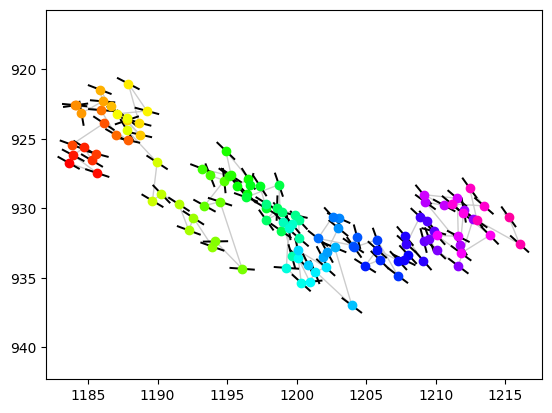

In [121]:
plt.plot(df_temp_track['POSITION_X'], df_temp_track['POSITION_Y'], linewidth=1, color='k', alpha = 0.2)

for time_point in range(len(df_temp_track.FRAME.unique())-1):
    plt.plot(df_temp_track.loc[time_point,'POSITION_X'], df_temp_track.loc[time_point,'POSITION_Y'], marker='o', color=cmap(time_point*2))
plt.quiver(df_temp_track.POSITION_X,df_temp_track.POSITION_Y,
           df_temp_track.AFT_angle_u, df_temp_track.AFT_angle_v, color='k', 
           pivot='mid', headaxislength=0, headlength=0, width=0.004)
plt.axis('equal')
plt.gca().invert_yaxis()
plt.savefig(output_image_folder+str(df_temp.File_name_raw.unique()[0])+'_AFT_vectors_track'+str(track)+'.png', dpi=300, bbox_inches='tight')


### Calculate average cos2 per track

In [45]:
file_list = glob.glob(csv_folder+'*/AFT_tracks_df_out.xlsx')

print(*file_list, sep="\n")

/Users/k1801626/OneDrive - King's College London/data/JP/AFT_track/siCCT8_si8/AFT_tracks_df_out.xlsx
/Users/k1801626/OneDrive - King's College London/data/JP/AFT_track/siCTRL/AFT_tracks_df_out.xlsx
/Users/k1801626/OneDrive - King's College London/data/JP/AFT_track/siCCT8_si5/AFT_tracks_df_out.xlsx


In [46]:
df_all = pd.DataFrame()

for df in range(len(file_list)):
    df_temp = pd.read_excel(file_list[df])

    df_list = [df_all, df_temp]
    df_all = pd.concat([df_all for df_all in df_list if not df_all.empty])

In [48]:
df_all.to_excel(csv_folder+'merged_Spots_AFT.xlsx')

In [49]:
df_all.Unique_ID.unique()

array(['siCCT8_si8_R1_Position_31_0', 'siCCT8_si8_R1_Position_31_1',
       'siCCT8_si8_R1_Position_31_2', 'siCCT8_si8_R1_Position_31_3',
       'siCCT8_si8_R1_Position_31_4', 'siCCT8_si8_R2_Position_33_0',
       'siCCT8_si8_R2_Position_33_1', 'siCTRL_R1_Position_6_0',
       'siCTRL_R1_Position_6_1', 'siCTRL_R1_Position_6_2',
       'siCTRL_R1_Position_6_3', 'siCTRL_R1_Position_6_4',
       'siCTRL_R2_Position_12_2', 'siCTRL_R2_Position_12_3',
       'siCTRL_R2_Position_12_4', 'siCCT8_si5_R1_Position_26_1',
       'siCCT8_si5_R1_Position_26_2', 'siCCT8_si5_R1_Position_26_3',
       'siCCT8_si5_R1_Position_26_4', nan, 'siCCT8_si5_R1_Position_26_8',
       'siCCT8_si5_R1_Position_26_9', 'siCCT8_si5_R2_Position_27_0',
       'siCCT8_si5_R2_Position_27_1', 'siCCT8_si5_R2_Position_27_2',
       'siCCT8_si5_R2_Position_27_3', 'siCCT8_si5_R2_Position_27_4'],
      dtype=object)

In [54]:
av_cos2 = []
for uniqueID in range(len(df_all.Unique_ID.unique())):
    df_temp = df_all.loc[df_all.Unique_ID == df_all.Unique_ID.unique()[uniqueID]]
    av_cos2 = np.append(av_cos2, df_temp.AFT_track_angle_cos2.mean())
av_cos2


array([0.42226262, 0.25427738, 0.45924899, 0.34659047, 0.22082708,
       0.40060713, 0.46993475, 0.32216486, 0.43769994, 0.49564425,
       0.40314901, 0.47652878, 0.5119275 , 0.48000609, 0.42484008,
       0.5006256 , 0.21898714, 0.38815247, 0.27633621,        nan,
       0.30553345,        nan, 0.4035011 , 0.37846158, 0.40094102,
       0.44582265, 0.48176928])

In [55]:
df_subset_out_tracks = pd.DataFrame(columns = ['Unique_ID','AFT_tracks_cos2_mean'])

df_subset_out_tracks.Unique_ID = df_all.Unique_ID.unique()
df_subset_out_tracks.AFT_tracks_cos2_mean = av_cos2

df_subset_out_tracks

,Unique_ID,AFT_tracks_cos2_mean
0,siCCT8_si8_R1_Position_31_0,0.422263
1,siCCT8_si8_R1_Position_31_1,0.254277
2,siCCT8_si8_R1_Position_31_2,0.459249
3,siCCT8_si8_R1_Position_31_3,0.346590
4,siCCT8_si8_R1_Position_31_4,0.220827
5,siCCT8_si8_R2_Position_33_0,0.400607
6,siCCT8_si8_R2_Position_33_1,0.469935
7,siCTRL_R1_Position_6_0,0.322165
8,siCTRL_R1_Position_6_1,0.437700
9,siCTRL_R1_Position_6_2,0.495644


In [56]:
df_tracks_out = pd.merge(df_tracks, df_subset_out_tracks, on='Unique_ID', how='outer')

df_tracks_out.head()                     

,LABEL,TRACK_INDEX,TRACK_ID,DIVISION_TIME_MEAN,DIVISION_TIME_STD,NUMBER_SPOTS,NUMBER_GAPS,NUMBER_SPLITS,NUMBER_MERGES,NUMBER_COMPLEX,...,MEAN_STRAIGHT_LINE_SPEED,LINEARITY_OF_FORWARD_PROGRESSION,MEAN_DIRECTIONAL_CHANGE_RATE,File_name_raw,Condition,experiment_nb,File_name,Repeat,Unique_ID,AFT_tracks_cos2_mean
0,Track_1,1.0,1.0,NaN,NaN,76.0,0.0,0.0,0.0,0.0,...,10.556033,0.651187,1.235458,Position_26,siCCT8_si5,R1,siCCT8_si5_R1_Position_26,1.0,siCCT8_si5_R1_Position_26_1,0.500626
1,Track_2,2.0,2.0,NaN,NaN,55.0,0.0,0.0,0.0,0.0,...,0.361223,0.013550,1.681933,Position_26,siCCT8_si5,R1,siCCT8_si5_R1_Position_26,1.0,siCCT8_si5_R1_Position_26_2,0.218987
2,Track_3,3.0,3.0,NaN,NaN,76.0,0.0,0.0,0.0,0.0,...,1.959934,0.149645,1.803235,Position_26,siCCT8_si5,R1,siCCT8_si5_R1_Position_26,1.0,siCCT8_si5_R1_Position_26_3,0.388152
3,Track_4,4.0,4.0,NaN,NaN,76.0,0.0,0.0,0.0,0.0,...,0.713082,0.044778,1.874086,Position_26,siCCT8_si5,R1,siCCT8_si5_R1_Position_26,1.0,siCCT8_si5_R1_Position_26_4,0.276336
4,Track_8,8.0,8.0,NaN,NaN,29.0,0.0,0.0,0.0,0.0,...,2.646769,0.140809,1.866365,Position_26,siCCT8_si5,R1,siCCT8_si5_R1_Position_26,1.0,siCCT8_si5_R1_Position_26_8,0.305533


In [57]:
df_tracks_out.to_excel(csv_folder+'merged_Tracks_AFT.xlsx')